# Task 03 - MINIMAX
## Pattern Recognition and Machine Learning

In [23]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
from minimax import *
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import copy
from PIL import Image
import time

#### Load data from *.npz files

In [25]:
data = np.load("data_33rpz_03_minimax.npz", allow_pickle=True)
alphabet = data["alphabet"]
images_tst = data["images_test"]
labels_tst = data["labels_test"]
cont = data["cont"].item()
discrete = data["discrete"].item()

## Discrete

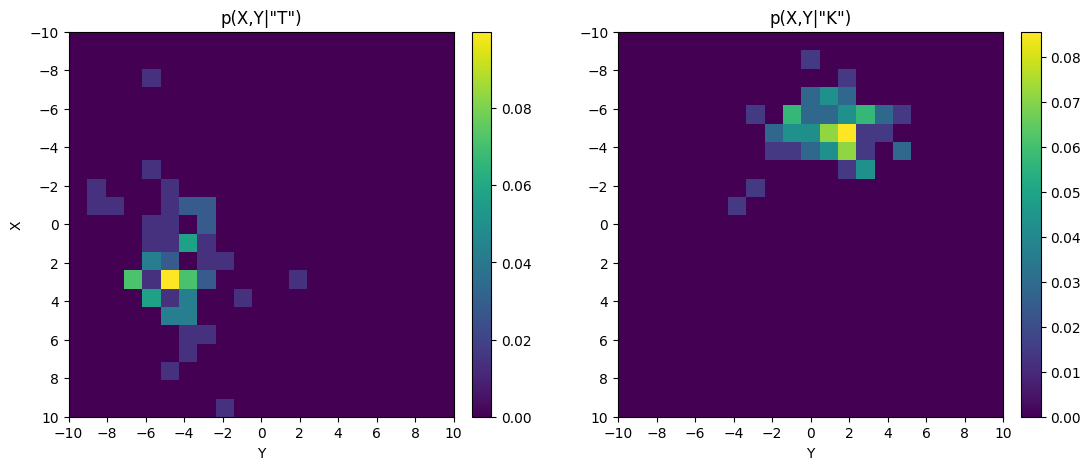

In [29]:
# fill your initials (There are Mirek Dušín and Chuck Norris in the assignment)
letters = "TK"
D1 = discrete[letters[0]].copy()
D2 = discrete[letters[1]].copy()

# plot the distributions
plt.figure(figsize=(13, 5))
plt.subplot(1, 2, 1)
plt.imshow(D1, extent=[-10,10,10,-10])
plt.xlabel('Y')
plt.ylabel('X')
plt.colorbar(fraction=0.046, pad=0.04)
plt.title('p(X,Y|"' + letters[0] + '")')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.subplot(1, 2, 2)
plt.imshow(D2, extent=[-10,10,10,-10])
plt.colorbar(fraction=0.046, pad=0.04)
plt.xlabel('Y')
plt.title('p(X,Y|"' + letters[1] + '")')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

# plt.savefig('minimax_distributions_discrete.png')

/home/tomkys144/Documents/CTU/b221/RPZ/HW/03/minimax.py:30: RuntimeWarning: invalid value encountered in true_divide
  r = (distribution1 / distribution2)


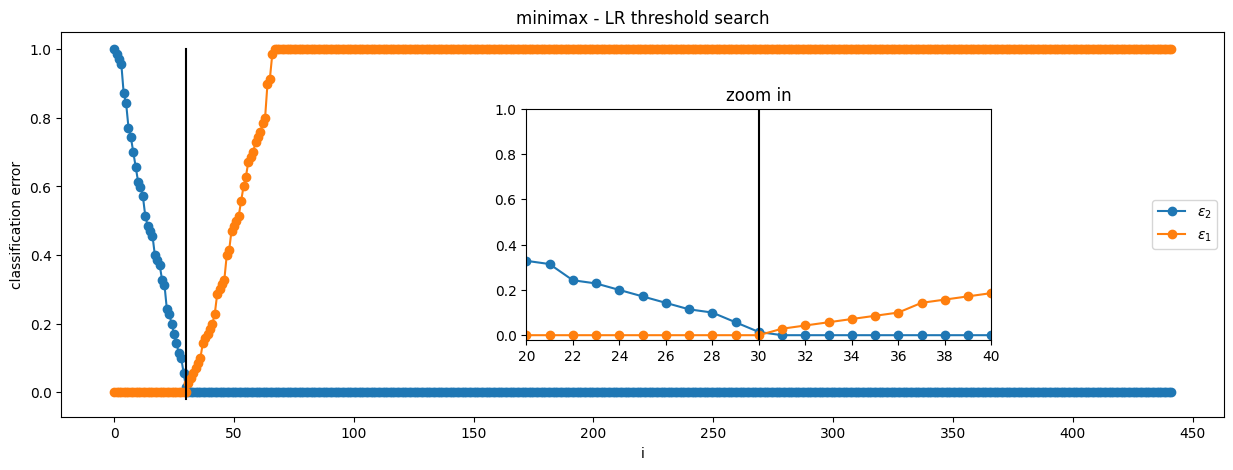

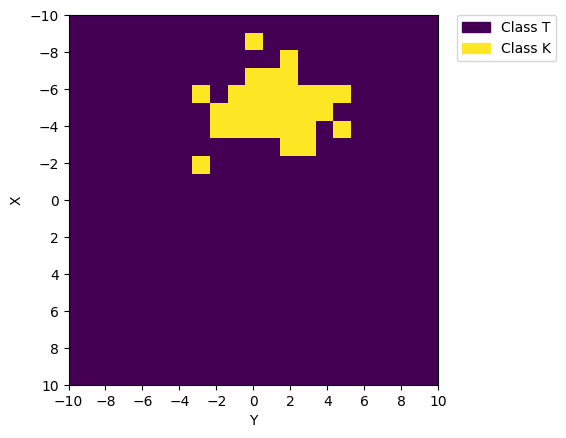

In [30]:
# the optimal Minimax strategy
start_time = time.time()
q_minimax_discrete, opt_i, eps1, eps2 = minimax_strategy_discrete(D1, D2)


# plot the search for the strategy
# plt.figure()
plot_lr_threshold(eps1, eps2, opt_i)
plt.savefig('minimax_lr_search_discrete.png')

# show the strategy
plot_discrete_strategy(q_minimax_discrete, letters)
plt.savefig('minimax_strategy_discrete.png')

In [13]:
# classification
images_test_2classes, labels_gt = create_test_set(images_tst, labels_tst, letters, alphabet)

labels_estimated_discrete = classify_discrete(images_test_2classes, q_minimax_discrete)

error_discrete = classification_error(labels_estimated_discrete, labels_gt)

Error discrete: 0.1500


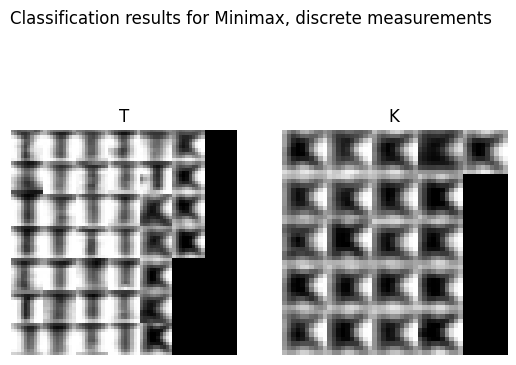

In [46]:
# classification visualisation
fig = plt.figure()
show_classification(images_test_2classes, labels_estimated_discrete, letters)
plt.suptitle('Classification results for Minimax, discrete measurements')
plt.savefig('minimax_classif_discrete.png')

print('Error discrete: {:.4f}'.format(error_discrete))

## Continuous

In [81]:
# D1 priors
priors_1 = np.linspace(0,1,101)

# zero one loss function (every error is penalised equally independent of the class)
W = np.array([[0, 1], [1, 0]])

In [82]:
# fill your initials
letters = 'MD'
D1 = cont[letters[0]].copy()
D2 = cont[letters[1]].copy()

#### Visualisation

In [83]:
risk = np.zeros_like(priors_1)
for i in range(priors_1.size):
    D1['Prior'] = float(priors_1[i])
    D2['Prior'] = float(1 - priors_1[i])
    q = find_strategy_2normal(D1, D2)
    risk[i] = bayes_risk_2normal(D1, D2, q)

In [84]:
D1['Prior'] = 0.25
D2['Prior'] = 1 - D1['Prior']
q_p1_fix = find_strategy_2normal(D1, D2)
risk_fix = risk_fix_q_cont(D1, D2, priors_1, q_p1_fix)

In [85]:
worst_risk = [worst_risk_cont(D1, D2, float(p)) for p in priors_1]

<IPython.core.display.Javascript object>


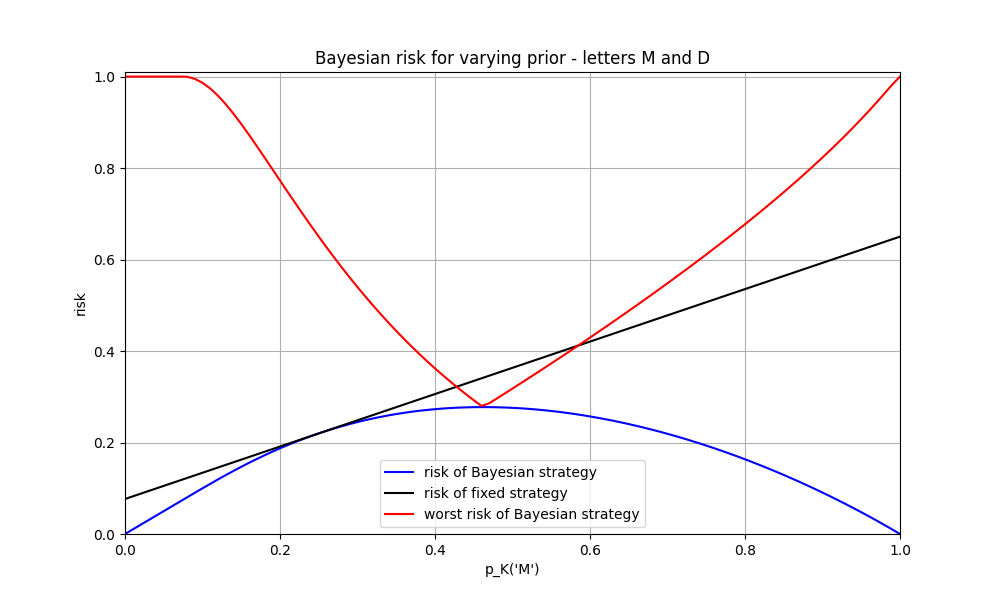

In [86]:
plt.figure(figsize=(10,6))
plt.plot(priors_1, risk, 'b')
plt.plot(priors_1, risk_fix, 'k')
plt.plot(priors_1, worst_risk ,'r')

plt.ylim([0, 1.01])
plt.xlim([0, 1.0])
plt.ylabel('risk')
plt.xlabel('p_K(\'{}\')'.format(letters[0]))
plt.legend(['risk of Bayesian strategy', 'risk of fixed strategy', 'worst risk of Bayesian strategy'])
plt.title('Bayesian risk for varying prior - letters {} and {}'.format(letters[0], letters[1]))
plt.grid('on')
# plt.savefig('plots_cont_' + letters.lower() + '.png')
plt.savefig('plots_cont.png')

In [87]:
# plot_bayesian_risk_for_varying_prior(letters, risk, risk_fix, worst_risk)
# # plt.savefig('plots_cont_' + letters.lower() + '.png')
# plt.savefig('plots_cont.png')

In [88]:
def plot_bayesian_risk_for_varying_prior(letters, risk, risk_fix, worst_risk):
    plt.figure(figsize=(10,6))
    plt.plot(priors_1, risk, 'b')
    plt.plot(priors_1, risk_fix, 'k')
    plt.plot(priors_1, worst_risk ,'r');

    plt.ylim([0, 1.01])
    plt.xlim([0, 1.0])
    plt.ylabel('R')
    plt.xlabel('p_K(x)')
    plt.legend(['risk of Bayesian strategy', 'risk of fixed strategy', 'worst risk of Bayesian strategy'])
    plt.title('Bayesian risk for varying prior. Letters {}, {}'.format(letters[0], letters[1]))
    plt.grid('on')

In [80]:
# uncomment following for interactive matplotlib
%matplotlib notebook
try:
    from ipywidgets import interact, interactive, fixed
    
    @interact(letter1=alphabet, letter2=alphabet, prior1_fixed=(0.,1.,0.01))
    def plot_bayes_cont_interactive(letter1='M', letter2='D', prior1_fixed=0.25):
        D1 = cont[letter1]
        D2 = cont[letter2]
        letters = letter1 + letter2
        
        risk = np.zeros_like(priors_1)
        for i in range(priors_1.size):
            D1['Prior'] = float(priors_1[i])
            D2['Prior'] = float(1 - priors_1[i])
            q = find_strategy_2normal(D1, D2)
            risk[i] = bayes_risk_2normal(D1, D2, q)
        
        D1['Prior'] = prior1_fixed
        D2['Prior'] = 1 - D1['Prior']
        q_p1_fix = find_strategy_2normal(D1, D2)
        risk_fix = risk_fix_q_cont(D1, D2, priors_1, q_p1_fix)
        worst_risk = [worst_risk_cont(D1, D2, float(p)) for p in priors_1]
        plot_bayesian_risk_for_varying_prior(letters, risk, risk_fix, worst_risk)

except ImportError:
    print('Optional feature.')

interactive(children=(Dropdown(description='letter1', index=10, options=('A', 'B', 'C', 'D', 'E', 'H', 'I', 'J…

#### Classification

In [89]:
q_minimax_cont, risk_minimax_cont = minimax_strategy_cont(D1, D2)
print('q: {}'.format(q_minimax_cont))
print('risk: {}'.format(risk_minimax_cont))
images_test_cont, labels_test_cont = create_test_set(images_tst, labels_tst, letters, alphabet)
measurements_cont = compute_measurement_lr_cont(images_test_cont)
labels_estimated_cont = classify_2normal(measurements_cont, q_minimax_cont)
                                  
error_cont = classification_error(labels_estimated_cont, labels_test_cont)

q: {'t1': -230.4460206974757, 't2': 3705.079667023583, 'decision': array([1, 0, 1], dtype=int32)}
risk: 0.2774251160903457


<IPython.core.display.Javascript object>


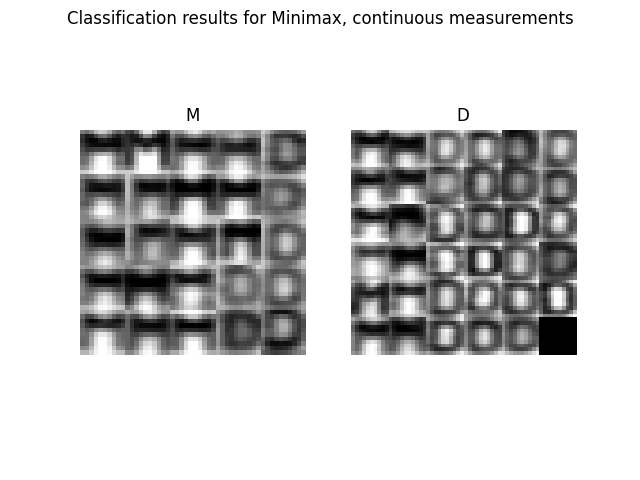

Error cont: 0.3167


In [90]:
fig = plt.figure()
show_classification(images_test_cont, labels_estimated_cont, letters)
plt.suptitle('Classification results for Minimax, continuous measurements')
# plt.savefig('minimax_classif_cont_' + letters.lower() + '.png')
plt.savefig('minimax_classif_cont.png')
print('Error cont: {:.4f}'.format(error_cont))